In [124]:
import pandas as pd
# df
file_path = r'C:\Users\Usuario\Downloads\archive\netflix_data - netflix_data.csv'
df = pd.read_csv(file_path)


In [126]:
df = df.dropna(subset=['release_year'])

In [128]:
df['release_year'] = df['release_year'].astype(int)

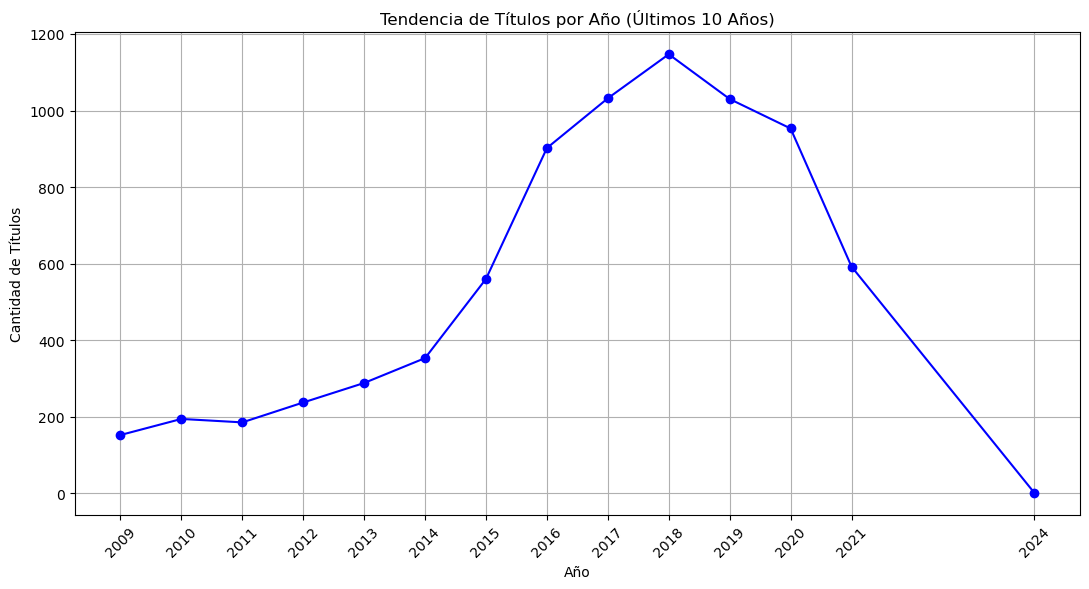

In [142]:
import pandas as pd # import pandas
import matplotlib.pyplot as plt #import matplotlib

# agrupo por año y contar el número de títulos por año
counts_year = df.groupby('release_year').size().reset_index(name='count')

# incluyo los ultimos 15 años, buscando el max de released_years
recent_years = counts_year[counts_year['release_year'] >= counts_year['release_year'].max() - 15]

# muestro tendencia de los ultimos 15 años
plt.figure(figsize=(11, 6))
plt.plot(recent_years['release_year'], recent_years['count'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de Títulos por Año (Últimos 10 Años)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Títulos')
plt.grid(True)
plt.xticks(recent_years['release_year'], rotation=45)
plt.tight_layout()
plt.show()


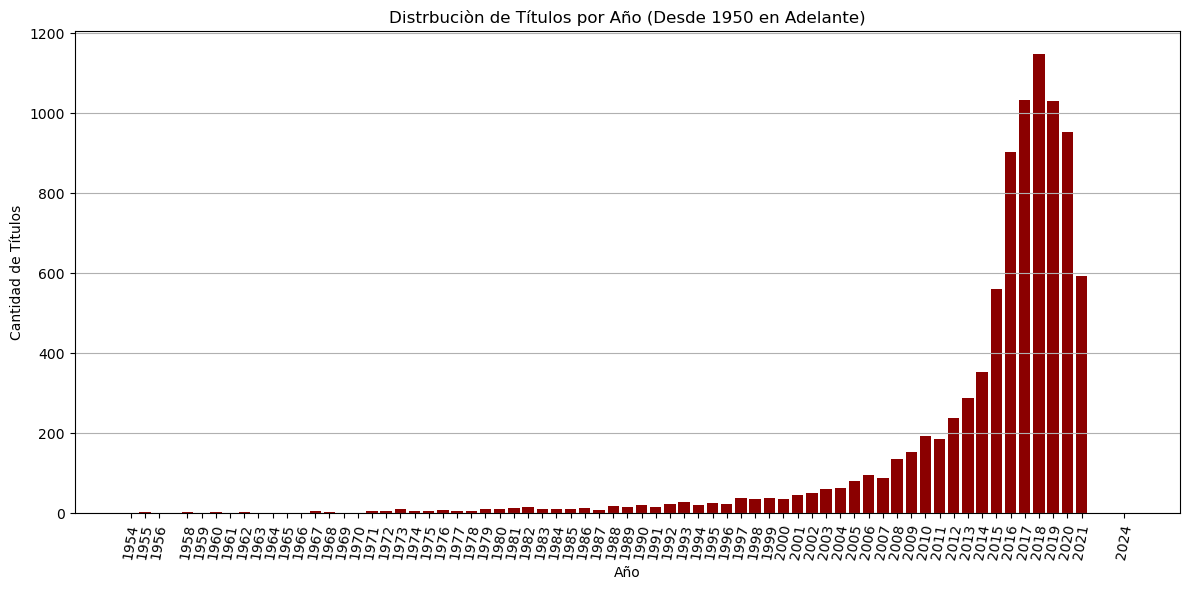

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# cuento la cantidad de titulos y agrupo por año
counts_yearly = df.groupby('release_year').size().reset_index(name='count')

# orden descendente por año, si quisiera al ascendente TRUE
counts_yearly = counts_yearly.sort_values(by='release_year', ascending=False)

# filtro para achicar un poco las cantidades de los años
filtered_year = counts_yearly[counts_yearly['release_year'] >= 1950]

# realizo la visualizaciòn
plt.figure(figsize=(12, 6))
plt.bar(filtered_year['release_year'], filtered_year['count'], color='darkred')
plt.title('Distrbuciòn de Títulos por Año (Desde 1950 en Adelante)')
plt.xlabel('Año')
plt.ylabel('Cantidad de Títulos')
plt.grid(True, axis='y')

# si quisiera ver las etiquetas con los valores de los datos exactos, agregaria este codigo
#for i, row in filtered_years.iterrows():
 #   plt.text(row['release_year'], row['count'], str(row['count']), ha='center', va='bottom')

# muestro los años de una manera que se puedan visualizar todo. Agrego 80 en rotation para que no este totalmente vertical el valor del eje x
plt.xticks(filtered_year['release_year'], rotation=80)

plt.tight_layout()
plt.show()


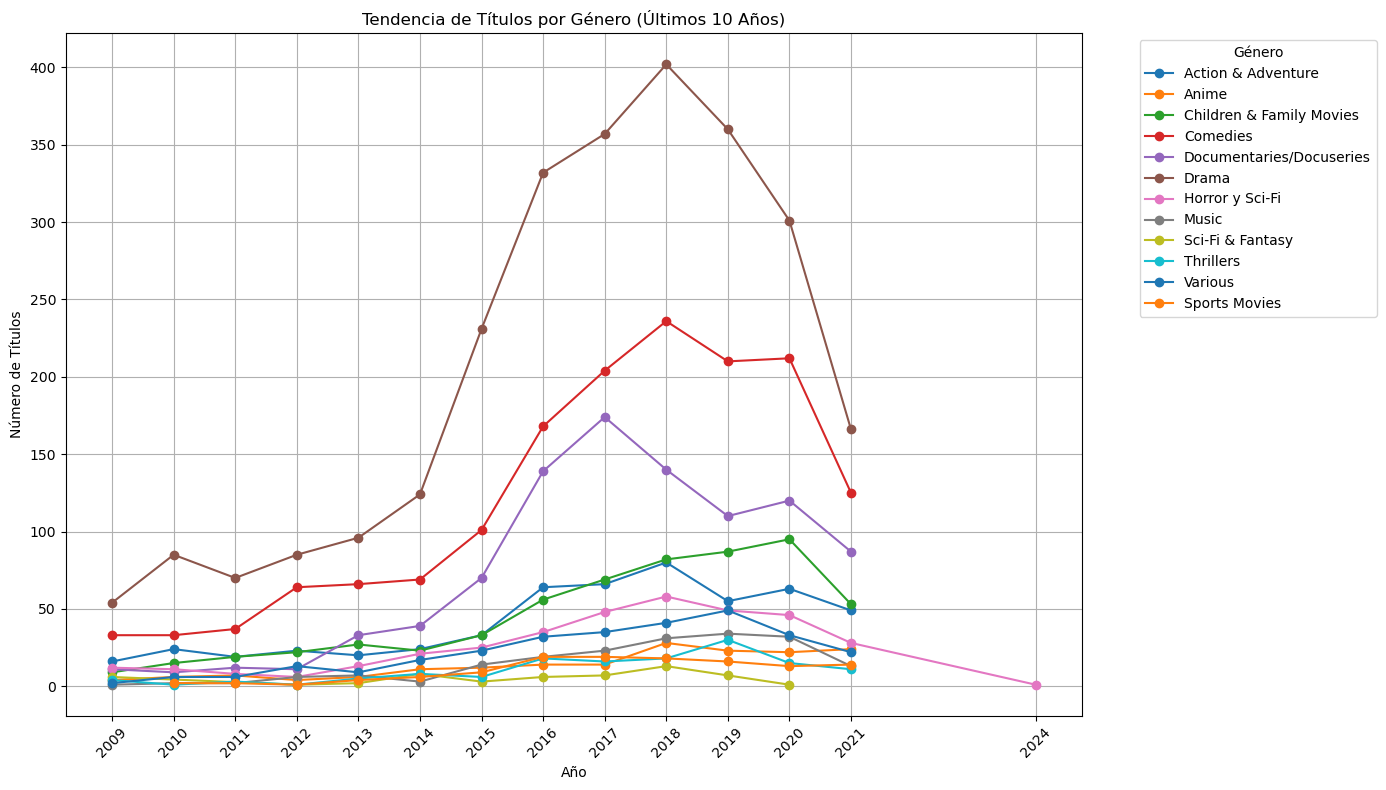

In [146]:
import pandas as pd
import matplotlib.pyplot as plt

# hago el case que tengo en el tablero de looker studio para identificar los generos, desde la columba listed_in
def categorize_genre(listed_in):
    if 'Dramas' in listed_in and 'International Movies' in listed_in:
        return 'Drama'
    elif 'Comedies' in listed_in and 'International Movies' in listed_in:
        return 'Comedies'
    elif 'Action & Adventure' in listed_in and 'International Movies' in listed_in:
        return 'Action & Adventure'
    elif 'Horror' in listed_in and 'Sci-Fi & Fantasy' in listed_in:
        return 'Horror y Sci-Fi'
    elif 'Horror' in listed_in:
        return 'Horror y Sci-Fi'
    elif 'Anime' in listed_in:
        return 'Anime'
    elif 'Horror' in listed_in and 'International Movies' in listed_in:
        return 'Horror y Sci-Fi'
    elif "Kids' TV" in listed_in:
        return 'Children & Family Movies'
    elif 'Action & Adventure' in listed_in:
        return 'Action & Adventure'
    elif 'Dramas' in listed_in or 'Romantic Movies' in listed_in:
        return 'Drama'
    elif 'Music & Musicals' in listed_in:
        return 'Music'
    elif 'Sci-Fi & Fantasy' in listed_in:
        return 'Sci-Fi & Fantasy'
    elif 'Sports Movies' in listed_in:
        return 'Sports Movies'
    elif 'Docuseries' in listed_in or 'Documentaries' in listed_in:
        return 'Documentaries/Docuseries'
    elif 'Thrillers' in listed_in:
        return 'Thrillers'
    elif 'Stand-Up Comedy' in listed_in or 'Comedies' in listed_in or 'Reality TV' in listed_in:
        return 'Comedies'
    elif 'Children & Family Movies' in listed_in and 'Comedies' in listed_in:
        return 'Children & Family Movies'
    elif 'Children & Family Movies' in listed_in:
        return 'Children & Family Movies'
    else:
        return 'Various'

df['genre'] = df['listed_in'].apply(categorize_genre)

# agrupo por año y hago el count
genre_yearly_counts = df.groupby(['release_year', 'genre']).size().reset_index(name='count')

# filtro los ultimos 15 años para ver tendencias
recent_years = genre_yearly_counts[genre_yearly_counts['release_year'] >= genre_yearly_counts['release_year'].max() - 15]

# muestro el grafico donde intento mostrar la tendencia de los generos por años
plt.figure(figsize=(14, 8))
for genre in recent_years['genre'].unique():
    genre_data = recent_years[recent_years['genre'] == genre]
    plt.plot(genre_data['release_year'], genre_data['count'], marker='o', label=genre)

plt.title('Tendencia de Títulos por Género (Últimos 10 Años)')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(recent_years['release_year'].unique(), rotation=45)
plt.tight_layout()
plt.show()


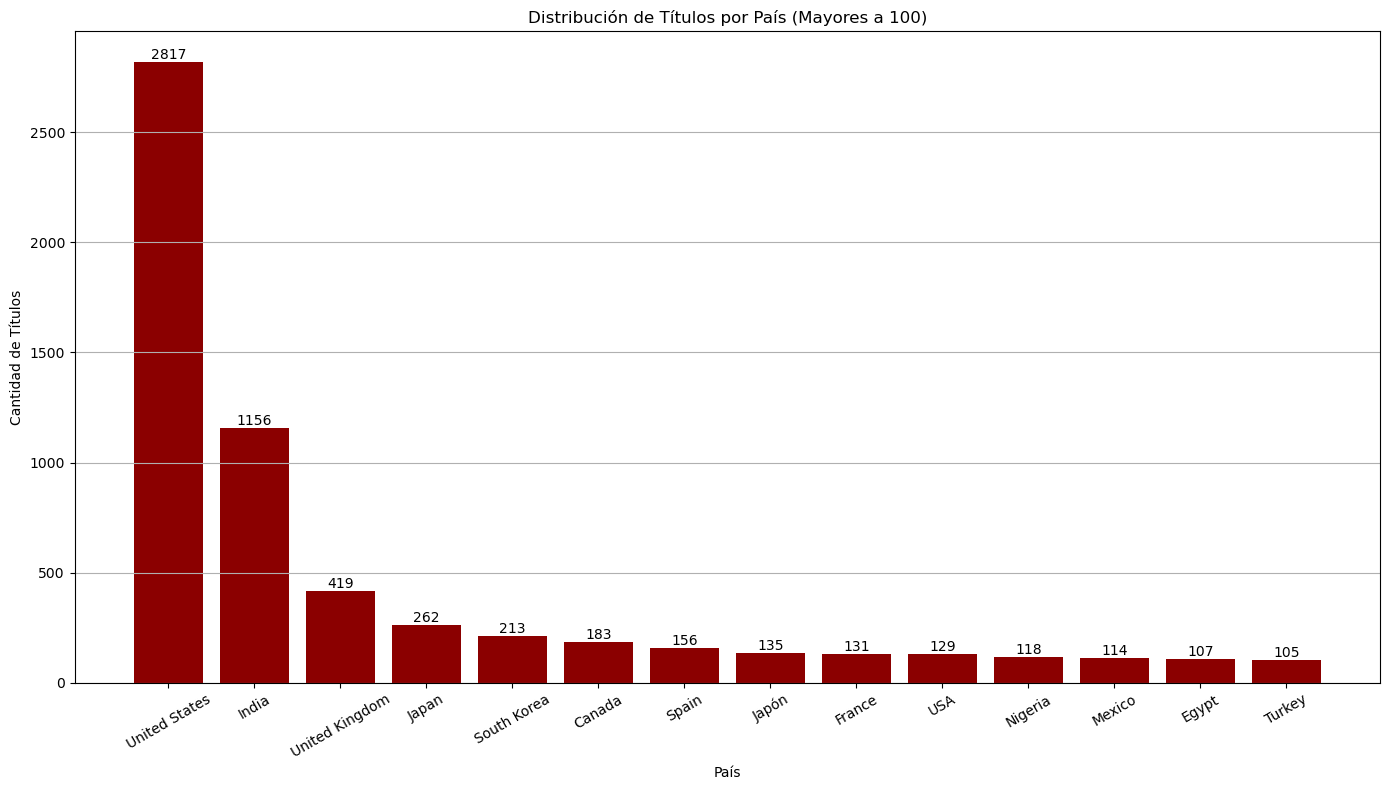

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# count y group by por pais
counts_country = df['country'].value_counts().reset_index(name='count')
counts_country.columns = ['country', 'count']
#ordeno desc
counts_country = counts_country.sort_values(by='count', ascending=False)

# filtro solo los paises que tiene + de 100 producciones
filtered_countries = counts_country[counts_country['count'] > 100]

# grafico
plt.figure(figsize=(14, 8))
plt.bar(filtered_countries['country'], filtered_countries['count'], color='darkred')
plt.title('Distribución de Títulos por País (Mayores a 100)')
plt.xlabel('País')
plt.ylabel('Cantidad de Títulos')
plt.grid(True, axis='y')

# marco el dato exacto de la etiqueta con un for
for i, row in filtered_countries.iterrows():
    plt.text(row['country'], row['count'], str(row['count']), ha='center', va='bottom')
plt.xticks(filtered_countries['country'], rotation=30)
plt.tight_layout()
plt.show()
